In [63]:
#Derivation with pyTorch
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import torch
import torch.autograd
from torch.autograd import Variable

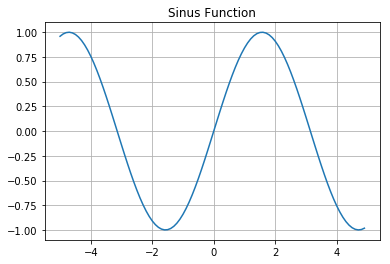

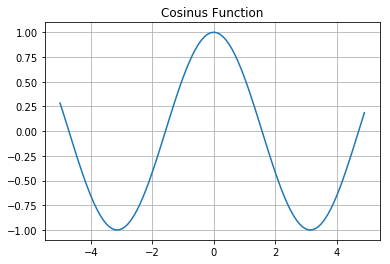

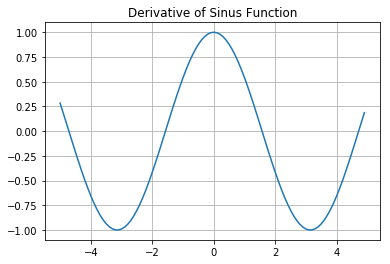

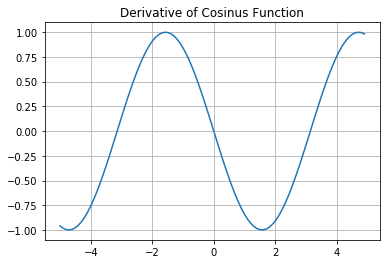

In [62]:
x = Variable(torch.arange(-5.0, 5.0, 0.1), requires_grad=True)

plt.plot(x.data.numpy(), torch.sin(x).data.numpy())
plt.grid(True)
plt.title("Sinus Function")
plt.show()

plt.plot(x.data.numpy(), torch.cos(x).data.numpy())
plt.grid(True)
plt.title("Cosinus Function")
plt.show()

if x.grad is not None:
    x.grad.data.zero_()
y = torch.sum(torch.sin(x))
y.backward()

plt.plot(x.data.numpy(), x.grad.data.numpy())
plt.grid(True)
plt.title("Derivative of Sinus Function")
plt.show()

if x.grad is not None:
    x.grad.data.zero_()
z = torch.sum(torch.cos(x))
z.backward()

plt.plot(x.data.numpy(), x.grad.data.numpy())
plt.grid(True)
plt.title("Derivative of Cosinus Function")
plt.show()

In [64]:
#Multi-Layer Perceptron (MLP)
# yi = x1 * wi + bi
# fi = sigmoid(yi)

# my torch edition
import numpy as np

import torch
from torch.autograd import Variable

x = torch.rand(1).double()

print(x.data)

w1 = Variable(10*torch.randn(2).double(), requires_grad=True)
w2 = Variable(10*torch.randn(2).double(), requires_grad=True)
b1 = Variable(10*torch.randn(2).double(), requires_grad=True)
b2 = Variable(10*torch.randn(1).double(), requires_grad=True)

y = torch.sum(torch.sigmoid(x*w1 + b1)*w2) + b2[0]
print(y)
f = torch.sigmoid(y)
print(f)

tensor([0.8298], dtype=torch.float64)
tensor(26.0372, dtype=torch.float64, grad_fn=<ThAddBackward>)
tensor(1.0000, dtype=torch.float64, grad_fn=<SigmoidBackward>)


In [65]:
#lecturer numpy edition
import numpy as np

def sigmoid(x):
    return 1./(1+np.exp(x))

sizes = [1,40,1]

w1 = np.random.randn(sizes[1],sizes[0])
b1 = np.random.randn(sizes[1],1)
w2 = np.random.randn(sizes[2],sizes[1])
b2 = np.random.randn(sizes[2],1)

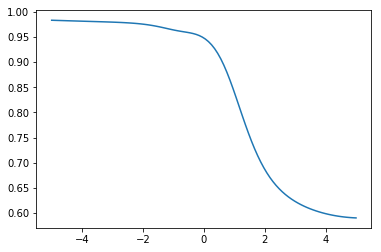

In [60]:
def nnet(x,w1,b1,w2,b2):
    y1 = w1.dot(x) + b1
    f1 = sigmoid(y1)
    y2 = w2.dot(f1) + b2
    f2 = sigmoid(y2)
    return f2

x = np.linspace(-5,5,100)
f = np.zeros_like(x)

for i in range(len(x)):
    f[i] = nnet(x[i],w1,b1,w2,b2)
    
plt.plot(x,f)
plt.show()